# Biomass Anlysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

region = 'Centro'

In [2]:
df = pd.read_csv('./dataset/' + region + '.csv').set_index('Fecha')
print(df.shape)
df.head()

(288, 17)


,Campo natural,Pastura base alfalfa,Pastura de agropiro,Pastura de digitaria,Pastura de lloron,Verdeo de avena,Verdeo de invierno,Verdeo de maiz,Verdeo de centeno,Pastura consociada,Pastura de alfalfa pura,Verdeo de raigras,Verdeo de sorgo,Campo natural con agropiro,Pastura de panicum coloratum,Verdeo de cebada,Verdeo de verano
Fecha,,,,,,,,,,,,,,,,,
01-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03-2000,436.7,807.7,511.3,1328.4,1775.1,234.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-2000,311.5,481.9,459.6,493.7,914.8,542.1,1413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-2000,285.0,413.3,407.0,310.6,646.9,839.3,971.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First, let's drop instances which only have NaN values

In [3]:
df.dropna(how='all', inplace=True)
df.head()

,Campo natural,Pastura base alfalfa,Pastura de agropiro,Pastura de digitaria,Pastura de lloron,Verdeo de avena,Verdeo de invierno,Verdeo de maiz,Verdeo de centeno,Pastura consociada,Pastura de alfalfa pura,Verdeo de raigras,Verdeo de sorgo,Campo natural con agropiro,Pastura de panicum coloratum,Verdeo de cebada,Verdeo de verano
Fecha,,,,,,,,,,,,,,,,,
03-2000,436.7,807.7,511.3,1328.4,1775.1,234.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-2000,311.5,481.9,459.6,493.7,914.8,542.1,1413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-2000,285.0,413.3,407.0,310.6,646.9,839.3,971.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-2000,271.0,402.2,385.0,345.9,564.2,791.2,533.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-2000,222.7,305.3,331.4,282.1,500.0,351.0,436.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's see how many NaN values are in every column

In [4]:
print(df.shape)
nan_pct = df.isna().sum()
nan_pct

(276, 17)


Campo natural                     4
Pastura base alfalfa              0
Pastura de agropiro               0
Pastura de digitaria             53
Pastura de lloron                 0
Verdeo de avena                 105
Verdeo de invierno              254
Verdeo de maiz                  138
Verdeo de centeno                90
Pastura consociada               57
Pastura de alfalfa pura          65
Verdeo de raigras               267
Verdeo de sorgo                 169
Campo natural con agropiro      184
Pastura de panicum coloratum    199
Verdeo de cebada                264
Verdeo de verano                270
dtype: int64

Because the volume of data is small solely the columns with less of 20% NaN values are selected

In [5]:
df.dropna(thresh=len(df)*0.8, axis=1, inplace=True)
print(df.shape)
df.head()

(276, 5)


,Campo natural,Pastura base alfalfa,Pastura de agropiro,Pastura de digitaria,Pastura de lloron
Fecha,,,,,
03-2000,436.7,807.7,511.3,1328.4,1775.1
04-2000,311.5,481.9,459.6,493.7,914.8
05-2000,285.0,413.3,407.0,310.6,646.9
06-2000,271.0,402.2,385.0,345.9,564.2
07-2000,222.7,305.3,331.4,282.1,500.0


That leaves us only with 5 sort of vegetation.

In [6]:
# let's ensure that there's not instances with only NaN values
df.dropna(how='all', inplace=True)
print(df.shape)

(276, 5)


Once we have handle with missing data, we could visualize it

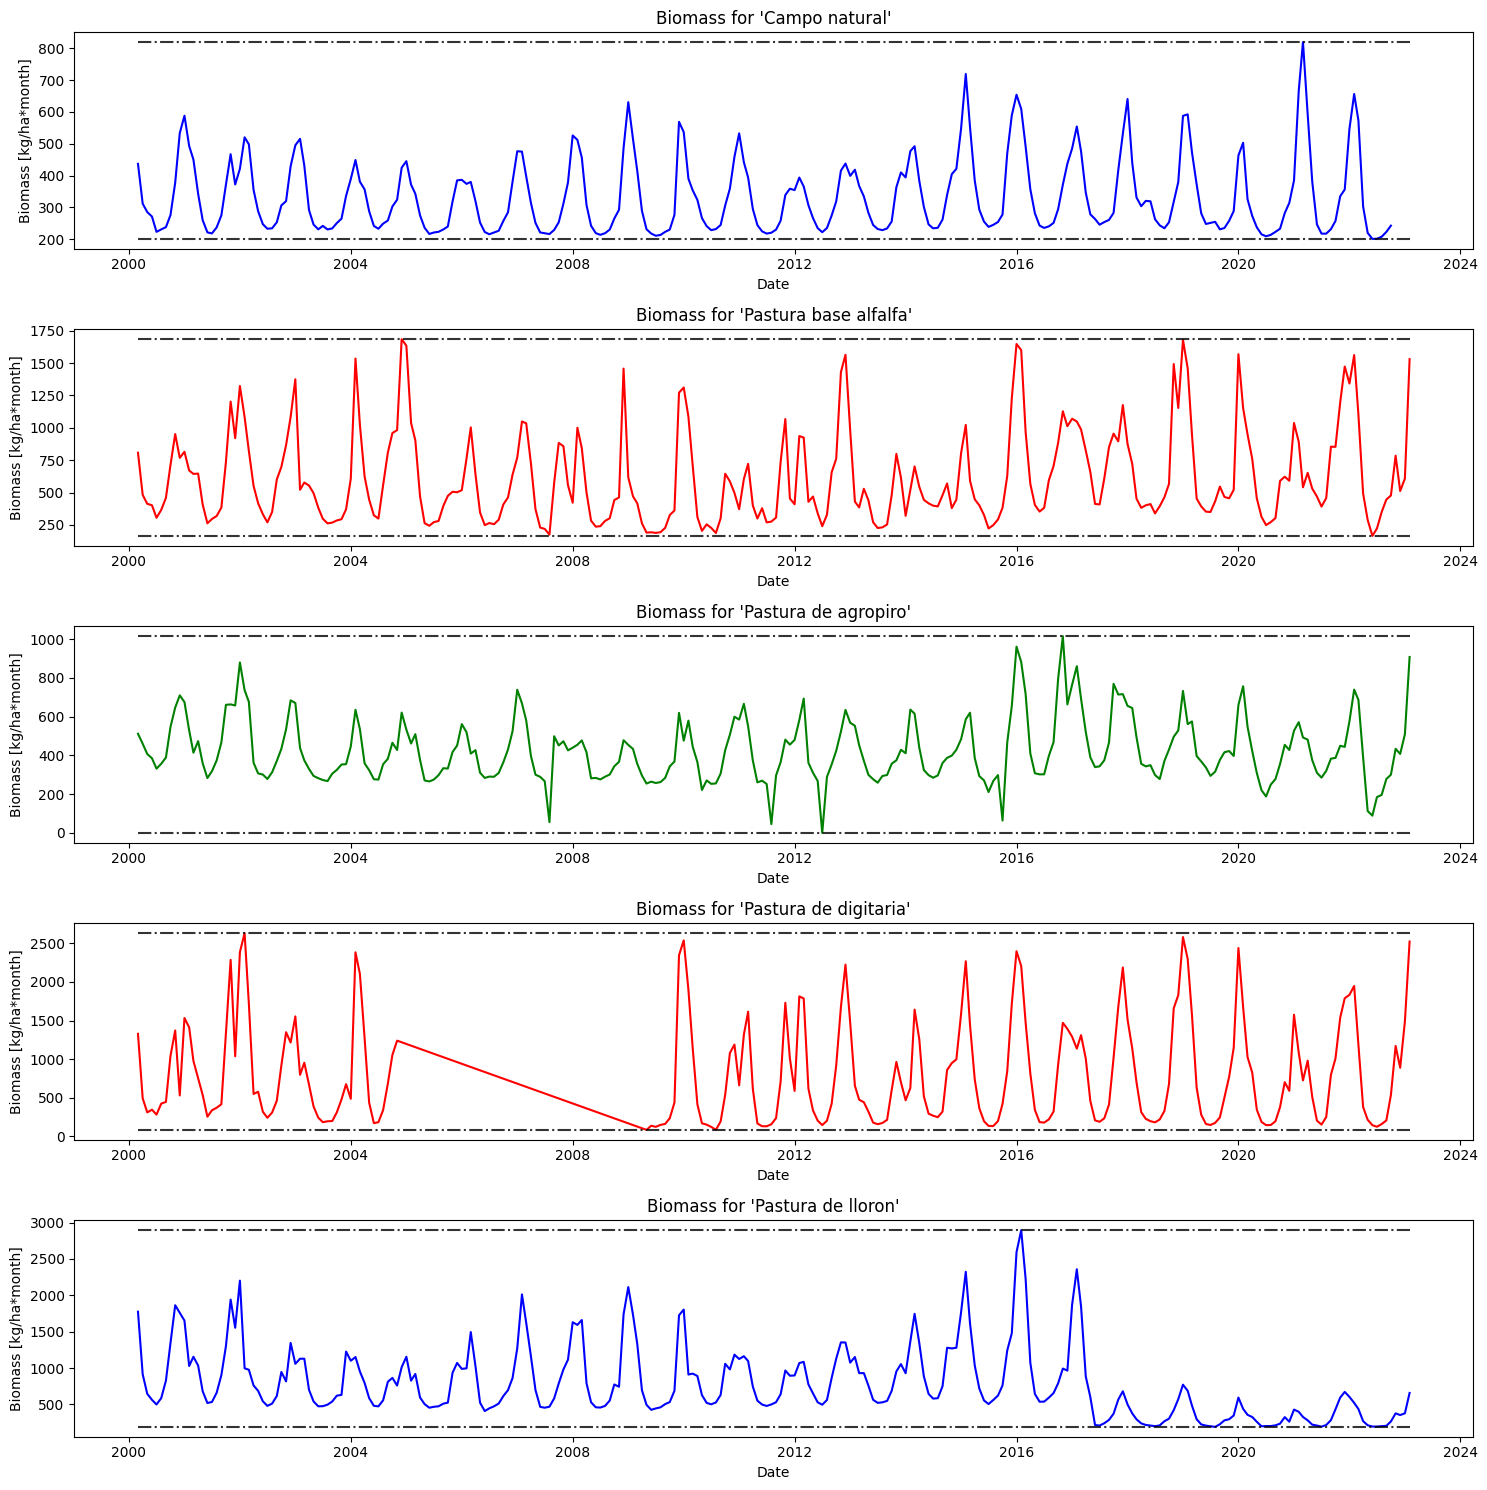

In [7]:
plt.figure(figsize=(15,15))
color = ['blue', 'red', 'green', 'red', 'blue']
max_values, min_values = [], []

for ii, column in enumerate(df.columns):
    plt.subplot(5, 1, ii+1)
    maxx, minn = df[column].max(), df[column].min()
    y_max = np.array([maxx for _ in range(len(df.index))])
    y_min = np.array([minn for _ in range(len(df.index))])
    max_values.append(y_max)
    min_values.append(y_min)
    x = pd.to_datetime(df.index)
    sns.lineplot(x=x, y=df[column], color=color[ii])
    plt.plot(x, y_max, '-.', color='black', alpha=0.8)
    plt.plot(x, y_min, '-.', color='black', alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Biomass [kg/ha*month]')
    plt.title("Biomass for '{}'".format(column))

plt.tight_layout()
plt.show()

We appreciate the behavior of the biomass for each vegetations throughout the last 23 years. Now let's see how the data is distributed.


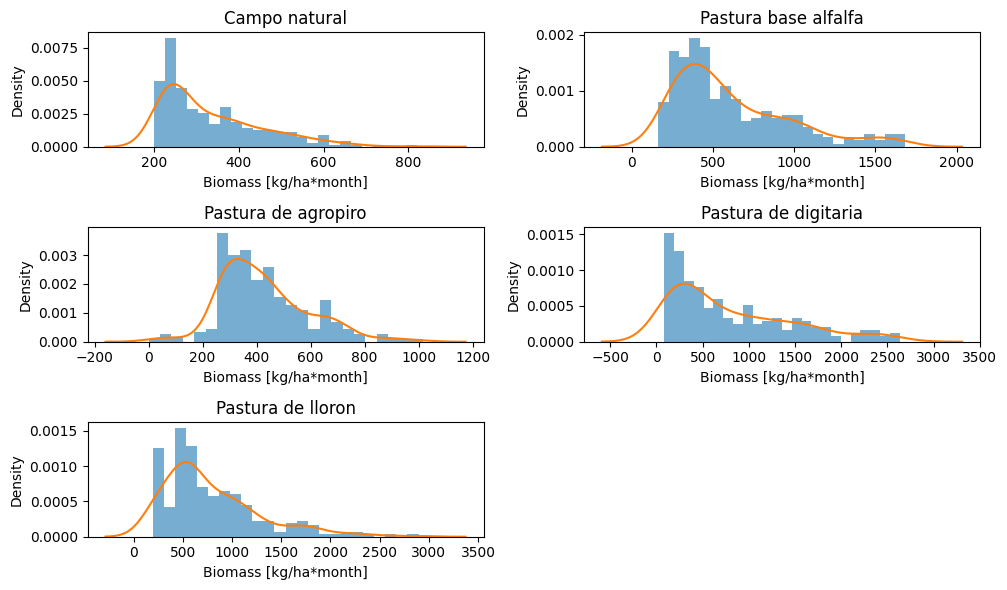

In [45]:
plt.figure(figsize=(10,6))
for ii, column in enumerate(df.columns):
    plt.subplot(3,2,ii+1)
    plt.hist(df[column], bins=24, alpha=0.6, density=True)
    sns.kdeplot(df[column])
    plt.title(column)
    plt.xlabel('Biomass [kg/ha*month]')
# sns.distplot(df['Campo natural'], bins=23)
plt.tight_layout()
plt.show()

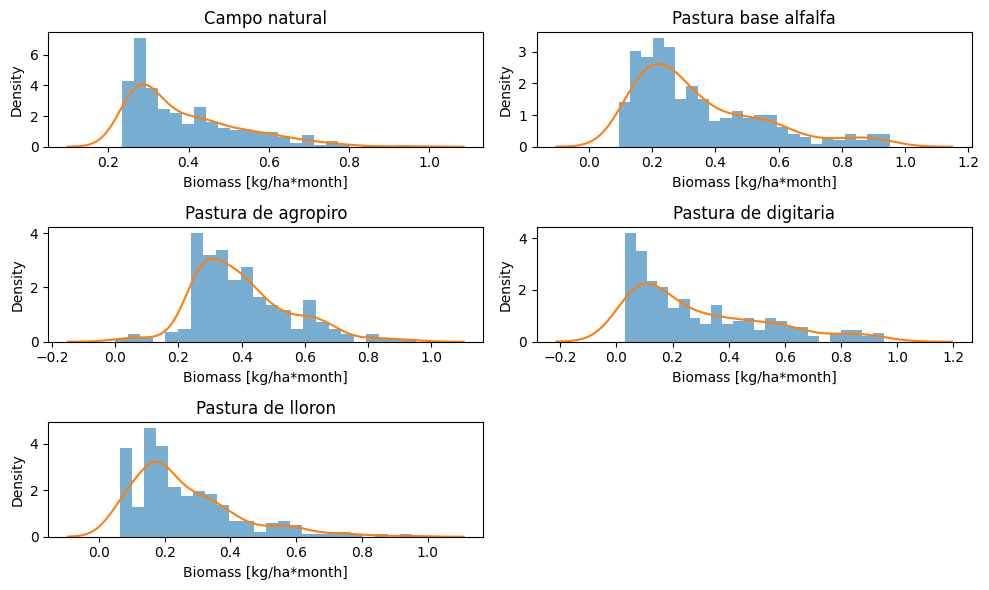

In [46]:
plt.figure(figsize=(10,6))
for ii, column in enumerate(df.columns):
    plt.subplot(3,2,ii+1)
    plt.hist(df[column]/(df[column].max()*1.05), bins=24, alpha=0.6, density=True)
    sns.kdeplot(df[column]/(df[column].max()*1.05))
    plt.title(column)
    plt.xlabel('Biomass [kg/ha*month]')
# sns.distplot(df['Campo natural']/(df['Campo natural'].max() * 1.05), bins=23)
plt.tight_layout()
plt.show()

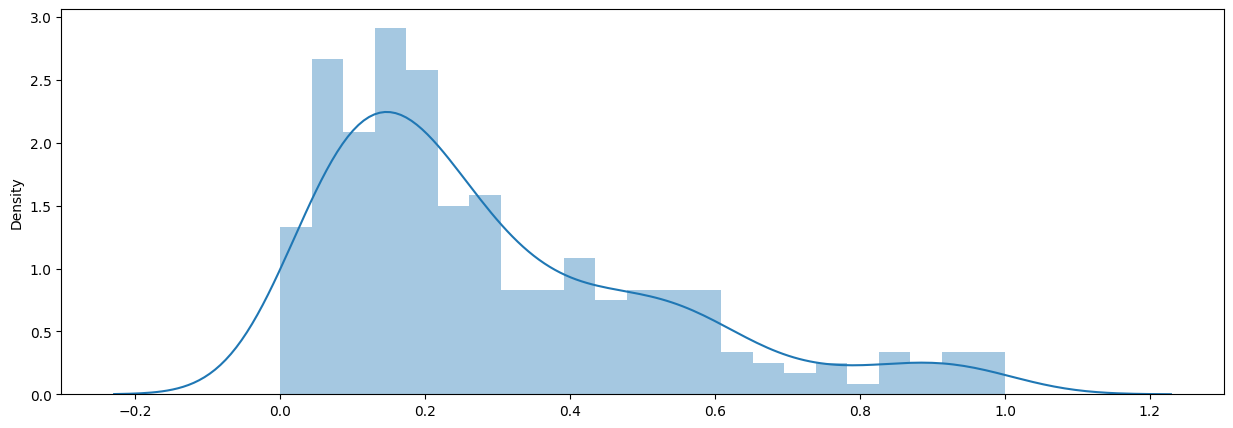

In [16]:
from sklearn.preprocessing import MinMaxScaler

column = df.columns[1] # Pastura base alfalfa
df_harvest = df.filter([column])
df_harvest.index = pd.to_datetime(df_harvest.index)
dataset = df_harvest.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data = scaled_data.flatten()
scaled_data[:10]

plt.figure(figsize=(15,5))
sns.distplot(scaled_data, bins=23)
plt.show()

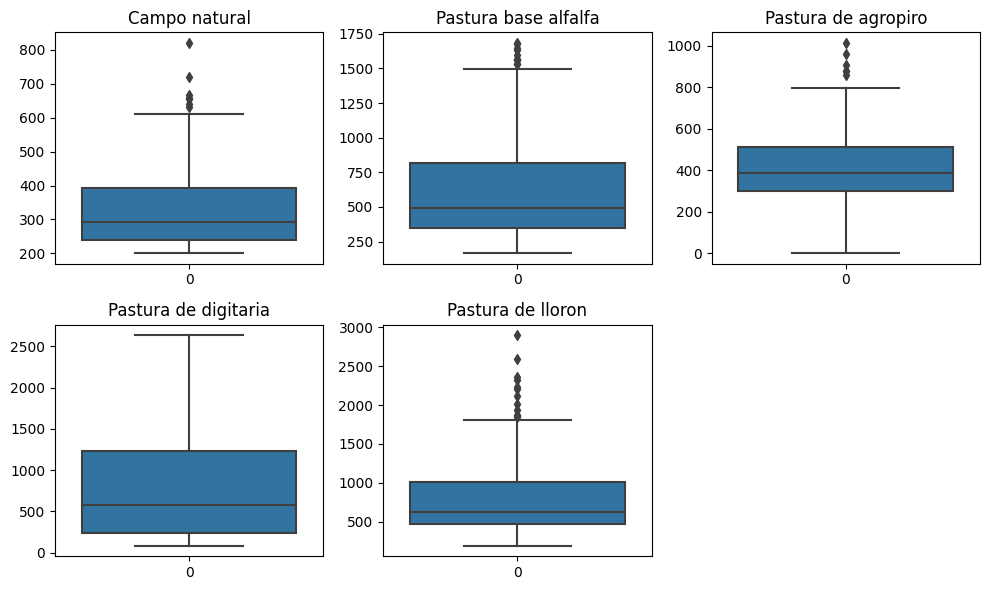

In [50]:
plt.figure(figsize=(10,6))
for ii, column in enumerate(df.columns):
    plt.subplot(2,3,ii+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

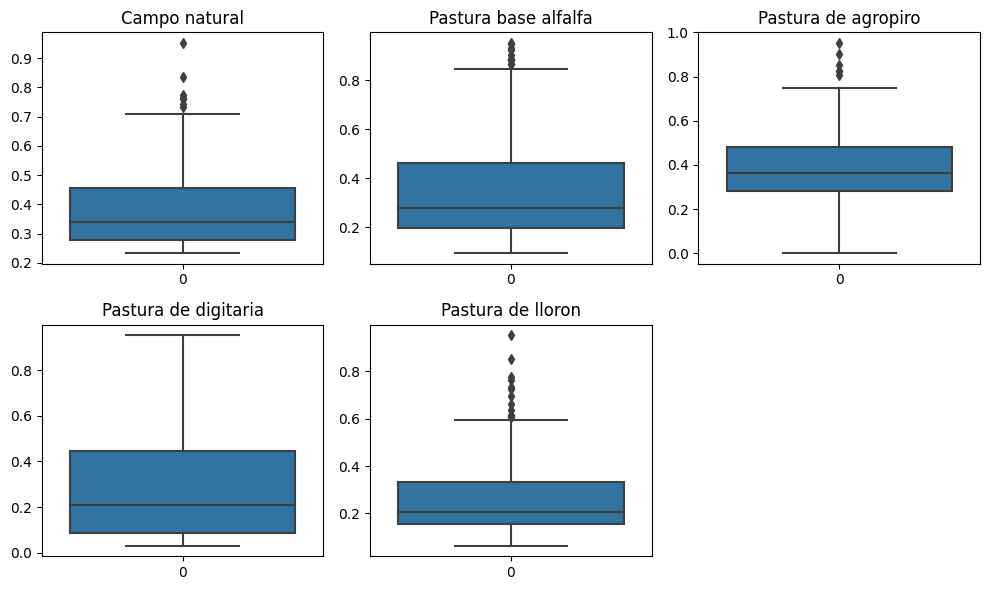

In [52]:
plt.figure(figsize=(10,6))
for ii, column in enumerate(df.columns):
    plt.subplot(2,3,ii+1)
    sns.boxplot(df[column]/(df[column].max() * 1.05))
    plt.title(column)
plt.tight_layout()
plt.show()

$$
\text{Transformation} \\

NDVI = \frac{B - B_{min}}{B_{max} - B_{min}}\\
Biomass = NDVI\cdot(B_{max} - B_{min}) + B_{min}\\

\text{for } B_{min}=0 \\

Biomass = B_{max} \cdot NDVI
$$